# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [30]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [31]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [32]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Store foodhub order database file name in a variable
foodhub_order_filename = 'foodhub_order.csv'

# Read data and create a data frame
df = pd.read_csv(f'/content/drive/MyDrive/ColabNotebooks/FoodHub/{foodhub_order_filename}')

In [34]:
# Display the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [35]:
# Extract the rows and column of a data frame using shape property
(rows, columns) = df.shape

# Print number of rows and column
print(f'{foodhub_order_filename} contains {rows} rows and {columns} columns')

foodhub_order.csv contains 1898 rows and 9 columns


#### Observations:
* The dataset contains 1,898 rows and 9 columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [36]:
# Print summery of the dataframe using info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB
None


#### Observations:
Here is the list of column names and associated datatypes of each column
*   order_id -> int64
*   customer_id -> int64
*   restaurant_name -> object
*   cuisine_type -> object
*   cost_of_the_order -> float64
*   day_of_the_week -> object
*   rating -> object
*   food_preparation_time -> int64
*   delivery_time -> int64


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [37]:
# Check for standard missing values for each column in a dataframe
print(df.isna().sum())

# Check for rating column for missing values
print(df['rating'].value_counts())

# Treat 'Not given' in the rating column as missing
df['rating'] = df['rating'].replace('Not given', pd.NA)

# Fill missing ratings with the mode of each cuisine type
df['filled_rating'] = df.groupby('cuisine_type')['rating'].transform(lambda x: x.fillna(x.mode().iloc[0]))
df['filled_rating'] = df['filled_rating'].astype('int64')

# Varify standard missing values after replacement with NaN
print(df.isna().sum())

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
filled_rating              0
dtype: int64


#### Observations:
* Initially, there were no missing values in the dataset, but further investigation on the 'rating' column I found that it contained entries labeled as 'Not given'. There are many ways to treat 'Not given' value but here I used replace method to replaced it with proper NaN values.

* **Optional:** Another approach that I took was to impute 'Not given' ratings based on cuisine_type because customers might give higher ratings for certain cuisines. I have created a new column 'filled_rating' that contains the imputed ratings as int64 type.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [38]:
# Statistical summary of the dataset
print(df.describe())

# Minimum, average, and maximum food preparation time
food_preparation_time = df['food_preparation_time'];
min_time = food_preparation_time.min()
avg_time = food_preparation_time.mean()
max_time = food_preparation_time.max()

# Print the minimum, average, and maximum food preparation time
print("\nFood preparation time:")
print(f"Minimum: {min_time} minutes")
print(f"Average: {avg_time:.2f} minutes")
print(f"Maximum: {max_time} minutes")

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  filled_rating  
count    1898.000000    1898.000000  
mean       24.161749       4.584299  
std         4.972637       0.665836  
min        15.000000       3.000000  
25%        20.000000       4.000000  
50%        25.000000       5.000000  
75%        28

#### Observations:
* Used describe method to check the statistical summary of the data. Used min, mean and max methods on the food_preparation_time column to calculate the minimum, average, and maximum time it takes for food to be prepared once an order is placed.

### **Question 5:** How many orders are not rated? [1 mark]

In [39]:
# Count how many ratings are NaN
# Note: Not using 'filled_rating'
not_rated_count = df['rating'].isna().sum()
print(f"Number of orders not rated: {not_rated_count}")

Number of orders not rated: 736


#### Observations:
* Since 'Not given' is replaced by NaN value in the question 3, not rated entries are the sum of all the NaN entries in the 'rating' column.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<Figure size 1500x800 with 0 Axes>

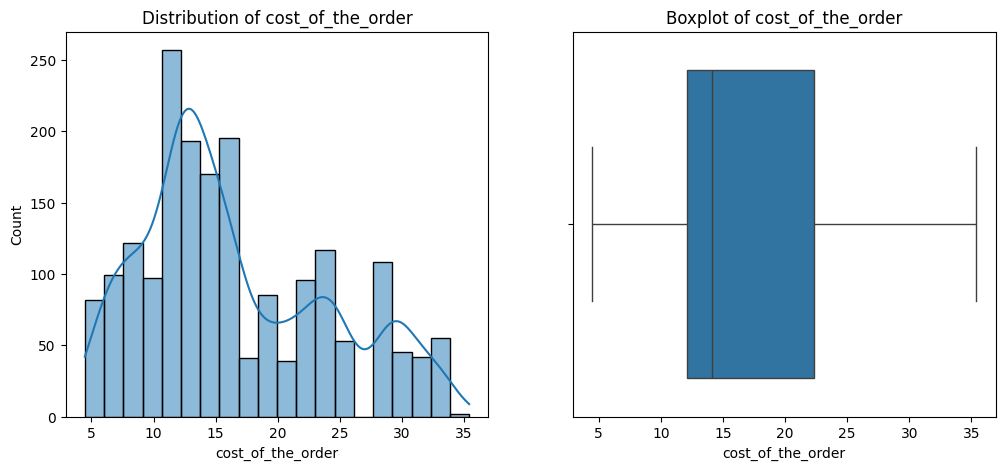

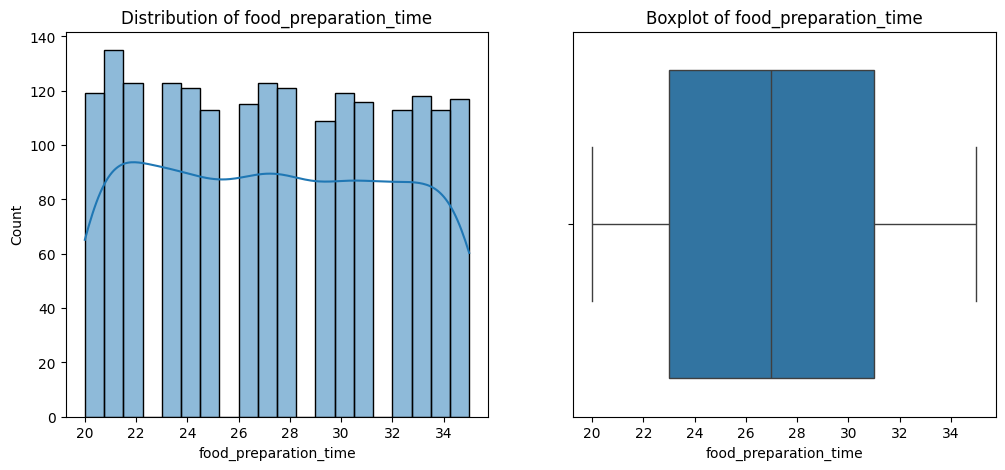

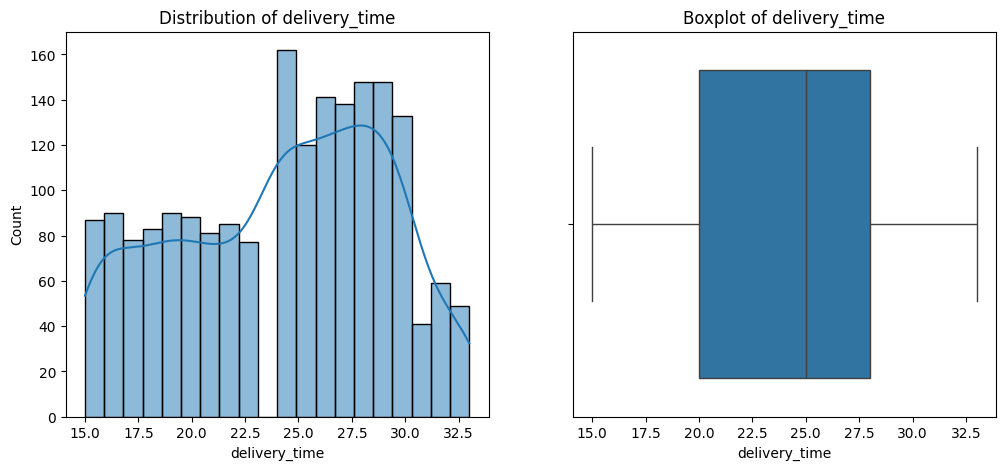

/tmp/ipython-input-4143145712.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)
/tmp/ipython-input-4143145712.py:28: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4143145712.py:28: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


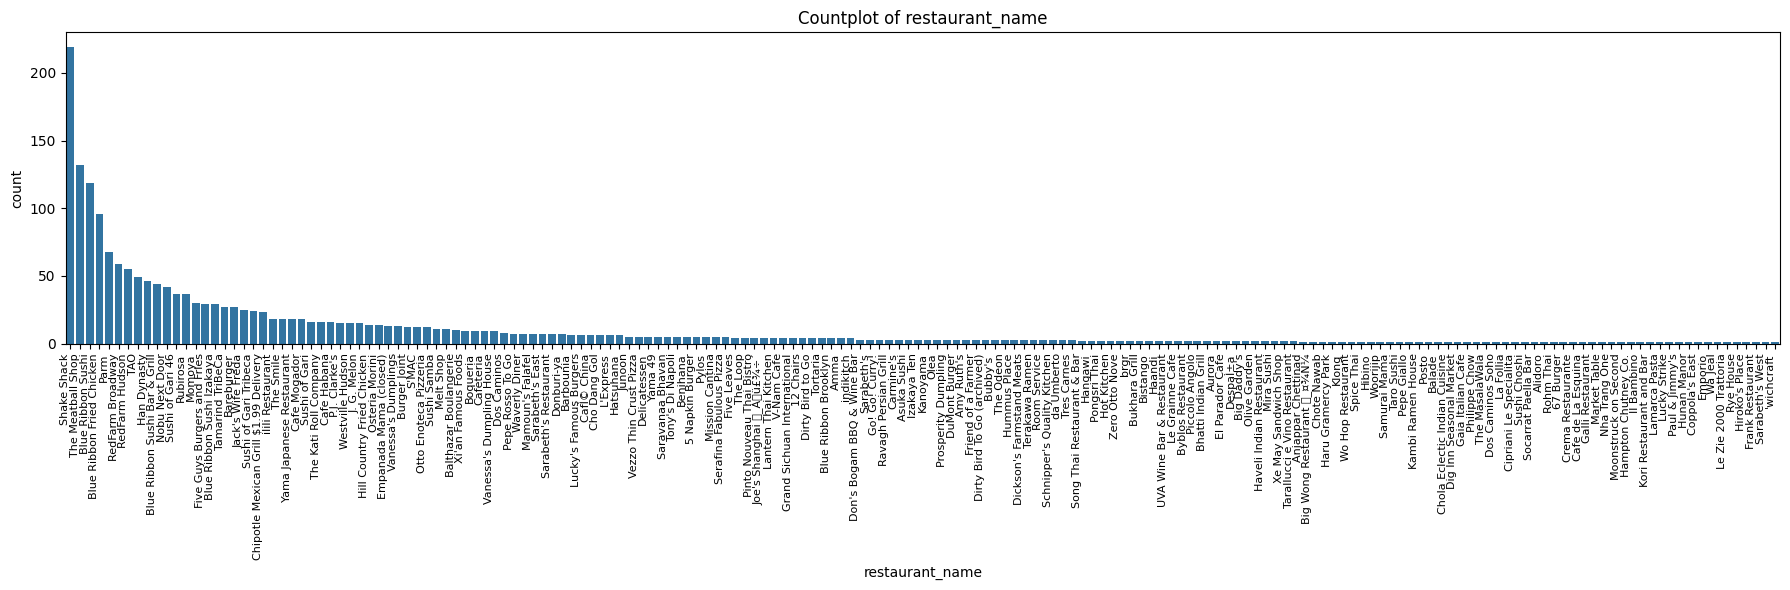

/tmp/ipython-input-4143145712.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)


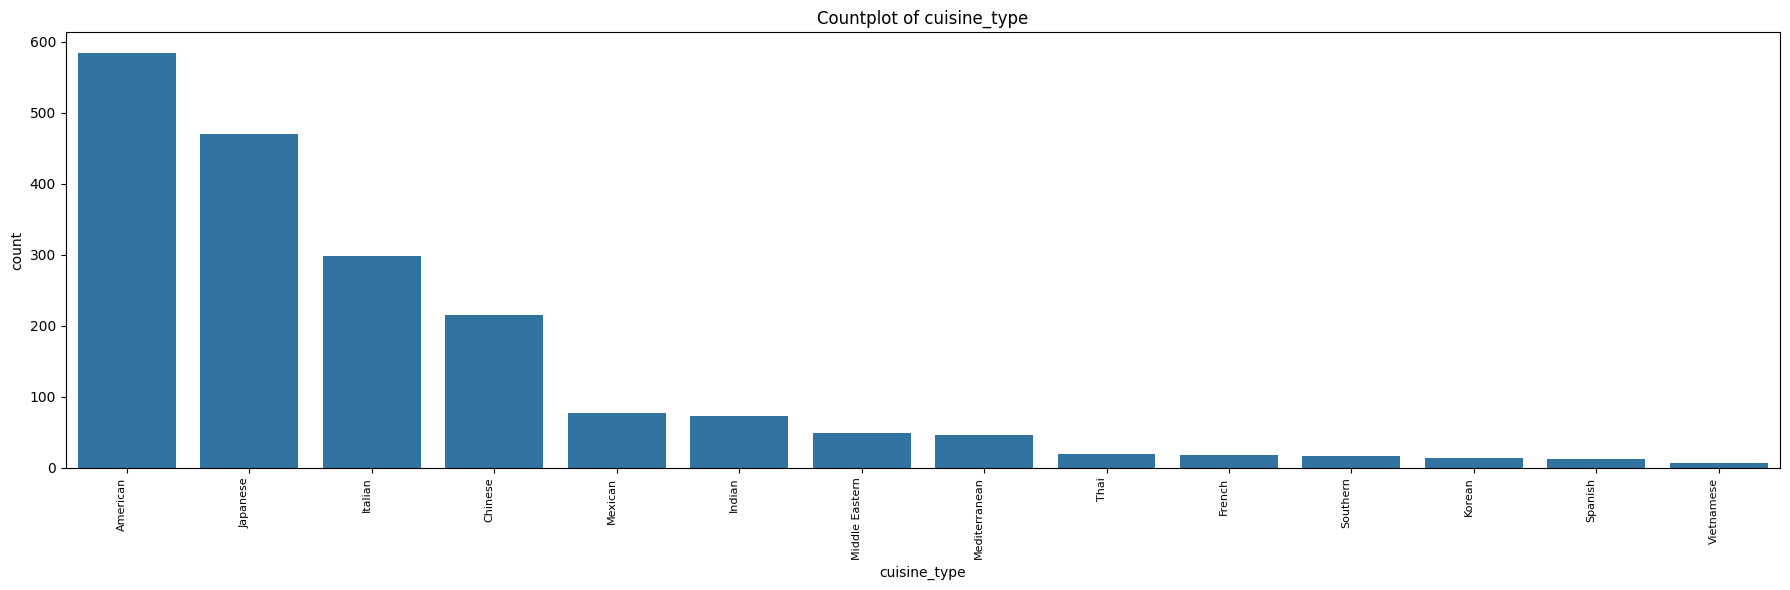

/tmp/ipython-input-4143145712.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)


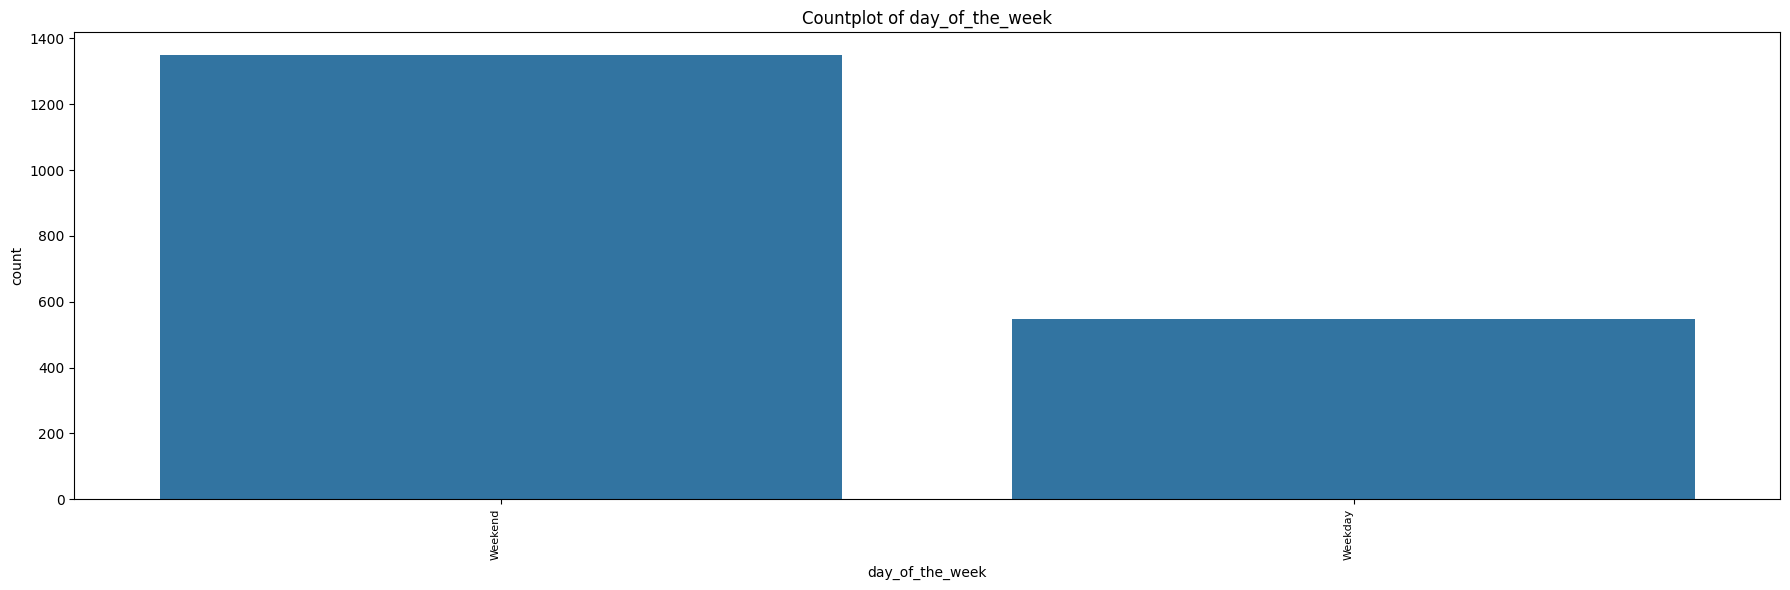

/tmp/ipython-input-4143145712.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)


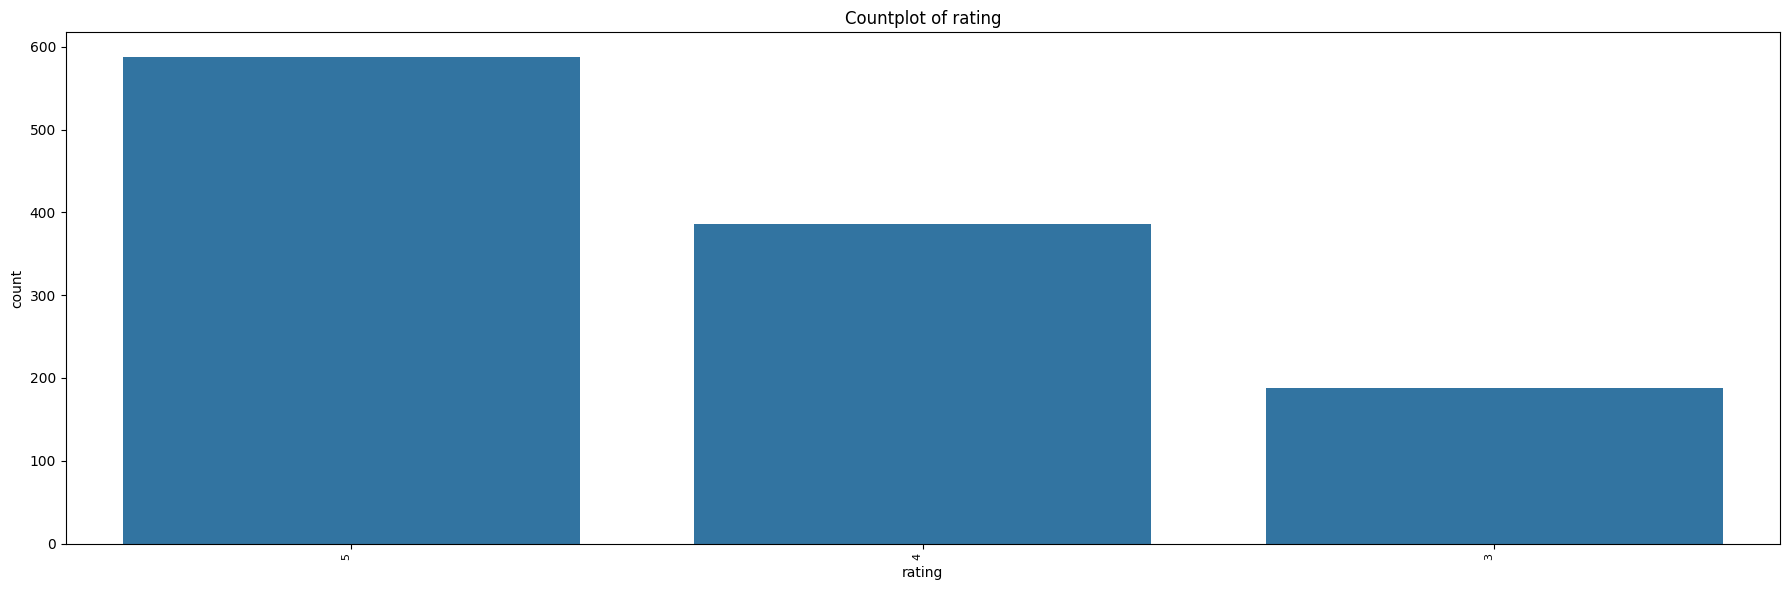

In [40]:

# Set plot fugure size
plt.figure(figsize=(15, 8))

# Numeric Variables
num_cols = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

# Hostograms and boxplots for numeric variables
for col in num_cols:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Categorical Variables
cat_cols = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']
# countplots for categorical variables
for col in cat_cols:
    plt.figure(figsize=(18, 6))
    order = df[col].value_counts().index
    ax = sns.countplot(x=col, data=df, order=order)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)
    plt.title(f"Countplot of {col}")
    plt.tight_layout()
    plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


/tmp/ipython-input-3497904862.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_restaurants.values, y=top5_restaurants.index, palette="pastel")


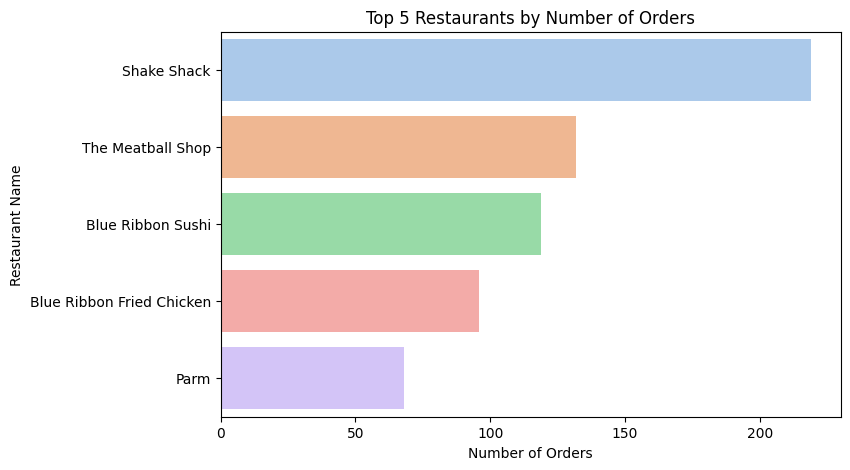

In [41]:
# Find top 5 restaurants by number of orders
top5_restaurants = df['restaurant_name'].value_counts().head(5)
print(top5_restaurants)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=top5_restaurants.values, y=top5_restaurants.index, palette="pastel")
plt.title("Top 5 Restaurants by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("Restaurant Name")
plt.show()

#### Observations:
* The top 5 restaurants (Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm) have the highest number of customer orders which indicates that they are the most popular or frequently used restaurants on FoodHub.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [42]:
# Filter weekend orders
weekend_orders = df[df['day_of_the_week'] == 'Weekend']

# Counts by cuisine
wknd_counts = weekend_orders['cuisine_type'].value_counts()
print(wknd_counts)

# Most popular cuisine and its count
top_cuisine = wknd_counts.idxmax()
top_count = wknd_counts.max()
print(f"\nMost popular cuisine on weekends: {top_cuisine} ({top_count} orders)")

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Middle Eastern     32
Mediterranean      32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

Most popular cuisine on weekends: American (415 orders)


#### Observations:
* The most popular cuisine on weekends is American with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [43]:
# Total number of orders
total_orders = len(df)

# Orders with cost greater than $20
high_value_orders = len(df[df['cost_of_the_order'] > 20])

# Percentage calculation
percentage_high_value_orders = (high_value_orders / total_orders) * 100
print(f"{percentage_high_value_orders:.2f}% of orders costing more than $20.")

29.24% of orders costing more than $20.


#### Observations:
* The percentage of orders costing more than $20 indicates how many customers tend to spend above the average order value.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [44]:
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()
print(f"Mean order delivery time is {mean_delivery_time:.2f} minutes")

Mean order delivery time is 24.16 minutes


#### Observations:
* The average (mean) order delivery time is ~24 minutes which indicates that most deliveries are completed within half an hour.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [45]:
# Top 3 customers by number of orders
top3_customers = df['customer_id'].value_counts().head(3)
print("Top 3 most frequent customers and their order counts:")
print(top3_customers)

Top 3 most frequent customers and their order counts:
customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
* The top 3 most frequent customers are identified based on the number of orders they placed. These customers are eligible to receive the 20% discount vouchers as a reward.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


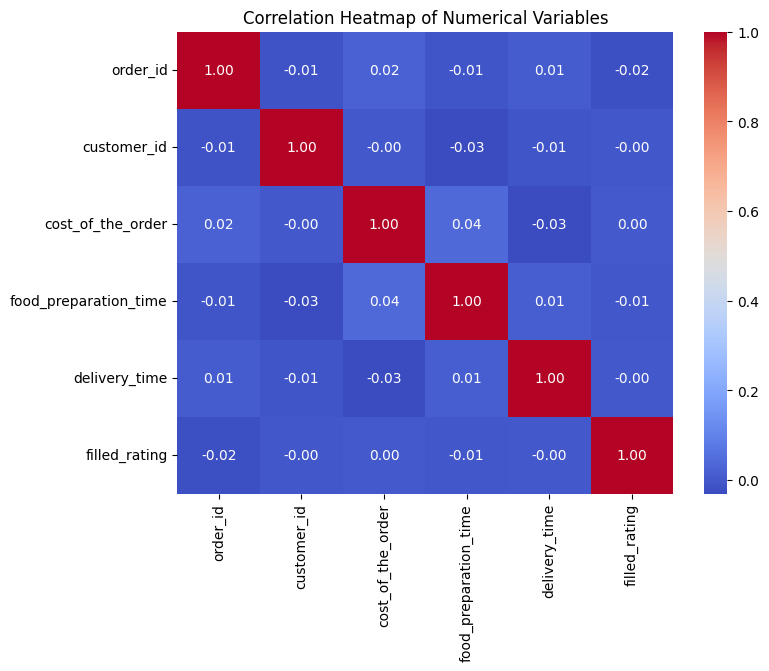

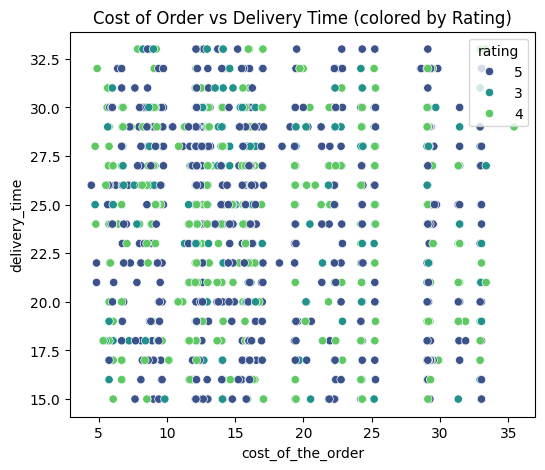

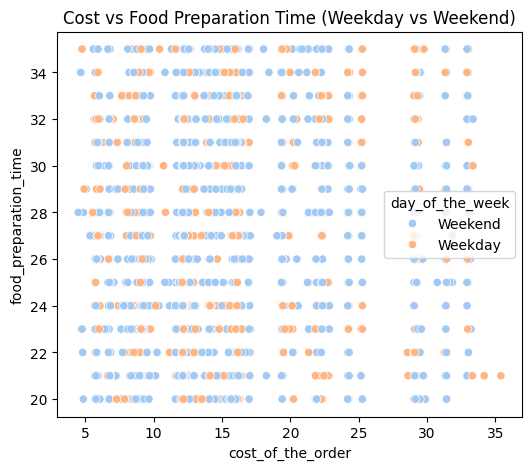

/tmp/ipython-input-1829628067.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="rating", y="delivery_time", palette="Set2")


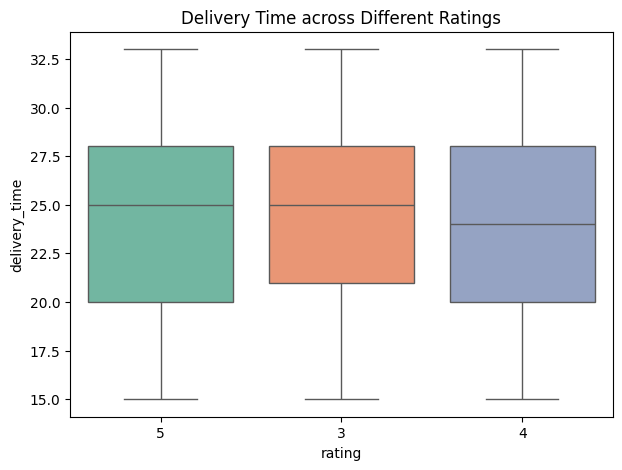

/tmp/ipython-input-1829628067.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['cuisine_type'].isin(top_cuisines)], x="cuisine_type", y="cost_of_the_order", palette="pastel")


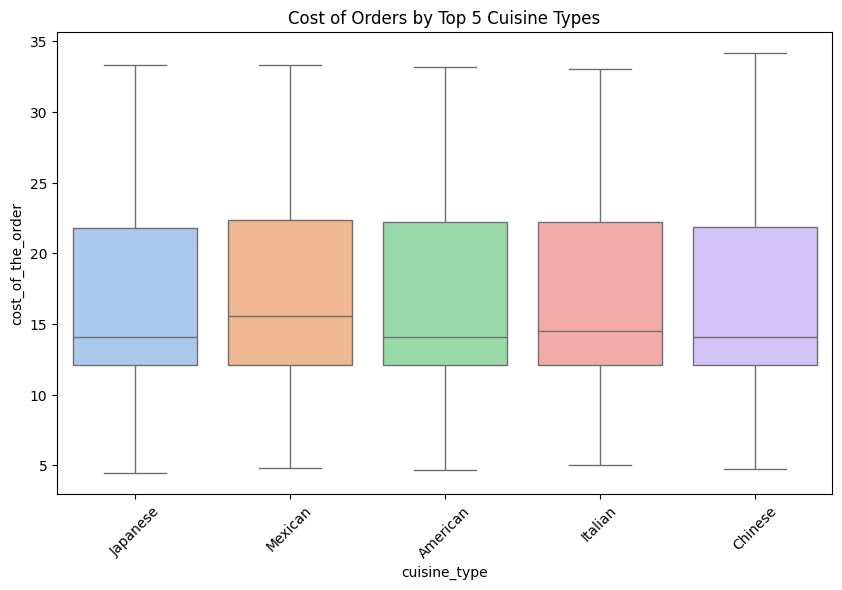

In [46]:
# Correlation between numerical variables
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# Cost vs delivery time
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="cost_of_the_order", y="delivery_time", hue="rating", palette="viridis")
plt.title("Cost of Order vs Delivery Time (colored by Rating)")
plt.show()

# Cost vs food preparation time
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x="cost_of_the_order", y="food_preparation_time", hue="day_of_the_week", palette="pastel")
plt.title("Cost vs Food Preparation Time (Weekday vs Weekend)")
plt.show()

# Rating vs Delivery Time
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="rating", y="delivery_time", palette="Set2")
plt.title("Delivery Time across Different Ratings")
plt.show()

# Cuisine Type vs Cost
plt.figure(figsize=(10,6))
top_cuisines = df['cuisine_type'].value_counts().head(5).index
sns.boxplot(data=df[df['cuisine_type'].isin(top_cuisines)], x="cuisine_type", y="cost_of_the_order", palette="pastel")
plt.title("Cost of Orders by Top 5 Cuisine Types")
plt.xticks(rotation=45)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [47]:
# ********************** Solution-1 **********************
# Group by restaurant and calculate rating count and mean rating using imputed ratings
restaurant_ratings = df.groupby('restaurant_name')['filled_rating'].agg(['count', 'mean']).reset_index()

# Filter restaurants that meet the criteria
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

print("Restaurants eligible for the promotional offer (based on imputed ratings):")
print(eligible_restaurants)

# ********************** Solution-2 **********************
# Convert object/string ratings to numeric/float64 and stored in 'rating_num' column
df['rating_num'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant and calculate rating count and mean rating
restaurant_ratings = df.groupby('restaurant_name')['rating_num'].agg(['count', 'mean']).reset_index()

# Filter restaurants that meet the criteria
eligible_restaurants = restaurant_ratings[(restaurant_ratings['count'] > 50) & (restaurant_ratings['mean'] > 4)]

print("\nRestaurants eligible for the promotional offer (based on keeping NaN ratings):")
print(eligible_restaurants)

Restaurants eligible for the promotional offer (based on imputed ratings):
               restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     96  4.552083
21           Blue Ribbon Sushi    119  4.521008
109                       Parm     68  4.500000
121           RedFarm Broadway     59  4.474576
122             RedFarm Hudson     55  4.490909
136                Shake Shack    219  4.561644
153          The Meatball Shop    132  4.689394

Restaurants eligible for the promotional offer (based on keeping NaN ratings):
               restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     64  4.328125
21           Blue Ribbon Sushi     73  4.219178
136                Shake Shack    133  4.278195
153          The Meatball Shop     84  4.511905


#### Observations:
* The first solution was by using the imputed ratings in the 'filled_rating' column (from question-3) to calculate the restaurants eligible for the promotional offer.

* The second solution was by converting 'rating' column from object to float64 and keeping NaN ratings as it is to calculate the restaurants eligible for the promotional offer.

* There are a few more restaurants eligible for the promotional offer in the first solution compared to second solution.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [48]:
# Commission logic
def calc_revenue_per_order(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0.0

# Calculate the revenue per order
df['revenue'] = df['cost_of_the_order'].apply(calc_revenue_per_order)

# Calculate the total revenue generated by the company across all orders
total_revenue = df['revenue'].sum()
print(f"Total company revenue (across all orders): ${total_revenue}")

# In addition: Calculate the total revenue generated by restaurant
revenue_by_restaurant = df.groupby('restaurant_name')['revenue'].sum().sort_values(ascending=False)
print(revenue_by_restaurant.head(10))

Total company revenue (across all orders): $6166.303
restaurant_name
Shake Shack                  703.6070
The Meatball Shop            419.8285
Blue Ribbon Sushi            360.4605
Blue Ribbon Fried Chicken    340.2035
Parm                         218.5570
RedFarm Broadway             191.4675
RedFarm Hudson               180.9340
TAO                          167.3570
Han Dynasty                  149.3985
Rubirosa                     140.8085
Name: revenue, dtype: float64


#### Observations:
* The total net revenue generated across all orders (all restaurants) in this dataset is $6,166.303. Example of top contributors by restaurant (from this dataset):

```
Shake Shack -> 703.6070
The Meatball Shop -> 419.8285
Blue Ribbon Sushi -> 360.4605
Blue Ribbon Fried Chicken -> 340.2035
Parm -> 218.5570
```








### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [49]:
# Create a new column 'total_time' which represents total time from food preparation to delivery
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Get total orders
total_orders = len(df)

# Get slow orders which takes over 60 minutes in total
slow_orders = len(df[df['total_time'] > 60])

# Calulate the slow order percentage
slow_order_percentage = (slow_orders / total_orders) * 100

# Print the results
print(f'Total number of orders = {total_orders}')
print(f'Total number of orders takes over 60 minutes = {slow_orders}')
print(f'{slow_order_percentage:.2f}%  of orders take more than 60 minutes to get delivered from the time the order is placed.')

Total number of orders = 1898
Total number of orders takes over 60 minutes = 200
10.54%  of orders take more than 60 minutes to get delivered from the time the order is placed.


#### Observations:
* Around 10.54% of the orders take over 60 minutes from order placement to delivery which indicates that nearly 1 in 10 orders experience longer delivery times. It may be because of peak-hour congestion or restaurants with longer preparation times.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [50]:
# Calculate mean delivery by day type (weekdays/weekends)
mean_delivery_by_daytype = df.groupby('day_of_the_week')['delivery_time'].mean()

# Print the results
print(f'Mean delivery time during weekdays is {mean_delivery_by_daytype.Weekday:.2f} minutes')
print(f'Mean delivery time during weekends is {mean_delivery_by_daytype.Weekend:.2f} minutes')

Mean delivery time during weekdays is 28.34 minutes
Mean delivery time during weekends is 22.47 minutes


#### Observations:
* Compare to weekdays and weekend delivery time, it seems that weekend delivery takes slightly less time. It could be because of lighter traffic, fewer corporate orders.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

**Order Volume and Trend**
1.   Total of 1,898 orders across multiple restaurants and cuisines.

2.   A few restaurants (e.g., Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken) dominate the order volume which indicates the strong brand loyalty or wider reach.
---

**Customer Spending**

1.   Around 30% of orders cost more than $20 which indicates a good portion of high value orders.

2.   Average order costs $10-25 which indicates customer prefer moderately priced meals.
---

**Preparation & Delivery Performance**
1.   Average food preparation time is ~27 minutes.

2.   Average delivery time is ~27–28 minutes (weekdays are slightly slower than weekends).

3.   About 10.54% of orders take more than 60 minutes to get delivered from the time order is placed. There is a potential opportunity for optimization.
---

**Customer Ratings**
1.   Most customers rate 4 or 5 which indicates a strong satisfaction.

2.   39% ratings are missing (“Not given”) which indicates that feedback collection could be improved.

3. Higher ratings correlate with faster deliveries which indicates service speed directly impacts satisfaction.
---

**Cuisine Popularity**
1. American cuisine is the most popular overall.

2. Other cuisines like Japanese, Italian and Chinese also receive consistent orders which indicates diverse preferences.
---

**Restaurant Performance**
1. A few restaurants (e.g., Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken) generate the most revenue for FoodHub.

2. High-rated restaurants with more than 50 reviews and average rating over 4 qualify for promotional offers, rewarding consistent quality.

### Recommendations:

**Improve Delivery Efficiency**
1. Further investigation required to identify why 10% of the orders takes over 60 minutes to get delivered from the time the order is placed.

2. Optimize delivery routes and allocate extra drivers during peak hours (especially on weekdays).
---

**Encourage Customer Feedback**
1. Replace “Not given” with a mandatory field or encorage customer by offering incentive on rating that will help maintain a complete satisfaction database.
---

**Mareting and Higher Profit**
1. Target marketing toward customers who often spend > $20 with combo offers or loyalty discounts because they are the most profitable segment.

2. Launch weekend promotions around American cuisine (the most popular).

3. Encourage underperforming cuisines to offer discounts or bundle deals to attract new customers.

---

In [51]:
# To export this notebook as .html for the submission
!jupyter nbconvert --to html '/content/drive/MyDrive/ColabNotebooks/FoodHub/PYF_Project_Learner_Notebook_Full_Code.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/ColabNotebooks/FoodHub/PYF_Project_Learner_Notebook_Full_Code.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 13 image(s).
[NbConvertApp] Writing 1303827 bytes to /content/drive/MyDrive/ColabNotebooks/FoodHub/PYF_Project_Learner_Notebook_Full_Code.html
